# Gait Size vs. Kinetic Energy

Code Written by Nathan Mayer

Code Adapted from the Triple Pendulum Example, Solving Nonlinear Four-Bar Constraints, Falling Rod Example, and Scipy Optimization Example Codes Written by Professor Daniel Aukes

Triple Pendulum Example Code: https://foldable-robotics.github.io/modules/dynamics/generated/08-triple-pendulum-example/

Scipy Optimization Example Code: https://foldable-robotics.github.io/modules/optimization/generated/02-scipy-optimization-example/ 

In [1]:
# Import all necessary packages:

#!pip install pynamics
import pynamics
from pynamics.frame import Frame
from pynamics.variable_types import Differentiable,Constant
from pynamics.system import System
from pynamics.body import Body
from pynamics.dyadic import Dyadic
from pynamics.output import Output,PointsOutput
from pynamics.particle import Particle
from pynamics.constraint import AccelerationConstraint,KinematicConstraint
import pynamics.integration
import numpy
import sympy
import scipy.optimize
import matplotlib.pyplot as plt
plt.ion()
from math import pi
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import scipy.interpolate as si

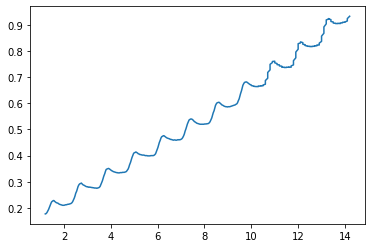

In [2]:
# Load Data for 4/7 Gait Size Experiment

df_47=pd.read_csv(r'C:\Users\kingo\Desktop\Classes\Spring 2022\EGR 557\Finalized Optimization Results\Gait Size Vs Speed\Data\Four_Seventh_Gait_Size.csv', sep=',')

x_47 = df_47.x.to_numpy()
y_47 = df_47.y.to_numpy()
t_47 = df_47.t.to_numpy()

plt.figure()
plt.plot(t_47,x_47)

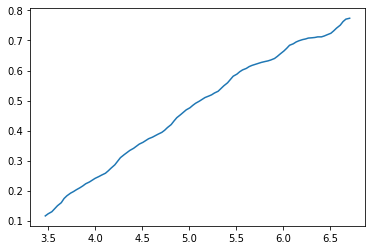

In [3]:
# Load Data for 1/2 Gait Size Experiment

df_2=pd.read_csv(r'C:\Users\kingo\Desktop\Classes\Spring 2022\EGR 557\Finalized Optimization Results\Gait Size Vs Speed\Data\Half_Gait_Size.csv', sep=',')

x_2 = df_2.x.to_numpy()
y_2 = df_2.y.to_numpy()
t_2 = df_2.t.to_numpy()

plt.figure()
plt.plot(t_2,x_2)

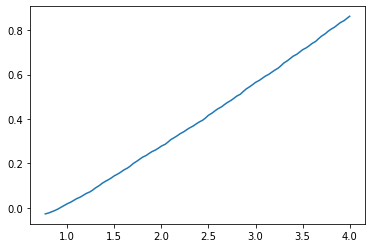

In [4]:
# Load Data for 1/3 Gait Size Experiment

df_3=pd.read_csv(r'C:\Users\kingo\Desktop\Classes\Spring 2022\EGR 557\Finalized Optimization Results\Gait Size Vs Speed\Data\Third_Gait_Size.csv', sep=',')

x_3 = df_3.x.to_numpy()
y_3 = df_3.y.to_numpy()
t_3 = df_3.t.to_numpy()

plt.figure()
plt.plot(t_3,x_3)

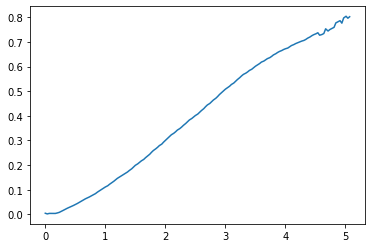

In [5]:
# Load Data for the First 1/4 Gait Size Experiment

df_4_1=pd.read_csv(r'C:\Users\kingo\Desktop\Classes\Spring 2022\EGR 557\Finalized Optimization Results\Gait Size Vs Speed\Data\Fourth_Gait_Size_1.csv', sep=',')

x_4_1 = df_4_1.x.to_numpy()
y_4_1 = df_4_1.y.to_numpy()
t_4_1 = df_4_1.t.to_numpy()

plt.figure()
plt.plot(t_4_1,x_4_1)

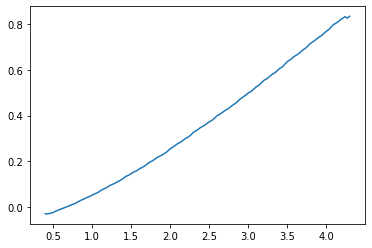

In [6]:
# Load Data for the Second 1/4 Gait Size Experiment

df_4_2=pd.read_csv(r'C:\Users\kingo\Desktop\Classes\Spring 2022\EGR 557\Finalized Optimization Results\Gait Size Vs Speed\Data\Fourth_Gait_Size_2.csv', sep=',')

x_4_2 = df_4_2.x.to_numpy()
y_4_2 = df_4_2.y.to_numpy()
t_4_2 = df_4_2.t.to_numpy()

plt.figure()
plt.plot(t_4_2,x_4_2)

# Determine Average Velocity for Each Test:

## 4/7 Gait Size Test

In [7]:
A = numpy.array([(t_47)+1.3]).T

In [8]:
def myfunc(k):
    # make sure our coefficients are in the form of a numpy array
    k = numpy.array(k)
    # generate y* = Ak^T
    y_model = A.dot(k.T)
    # sum the square of the error of our model against the input data, y_rand
    error = ((y_model-x_47)**2).sum()
    #return the error
    return error

In [9]:
ini = [1]*A.shape[1]
ini

[1]

In [10]:
sol = scipy.optimize.minimize(myfunc,ini)
k_optimum = sol.x
Velocity_47 = k_optimum
Velocity_47

array([0.05958925])

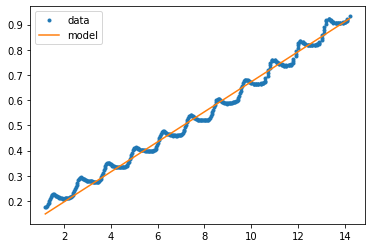

In [11]:
y_model = A.dot(k_optimum.T)
fig = plt.figure()
ax = fig.add_subplot()
a = ax.plot(t_47,x_47,'.')
b = ax.plot(t_47,y_model)
ax.legend(a+b,['data','model'])

## 1/2 Gait Size Test

In [12]:
A = numpy.array([(t_2)-2.7]).T

In [13]:
def myfunc(k):
    # make sure our coefficients are in the form of a numpy array
    k = numpy.array(k)
    # generate y* = Ak^T
    y_model = A.dot(k.T)
    # sum the square of the error of our model against the input data, y_rand
    error = ((y_model-x_2)**2).sum()
    #return the error
    return error

In [14]:
ini = [1]*A.shape[1]
ini

[1]

In [15]:
sol = scipy.optimize.minimize(myfunc,ini)
k_optimum = sol.x
Velocity_2 = k_optimum
Velocity_2

array([0.19901682])

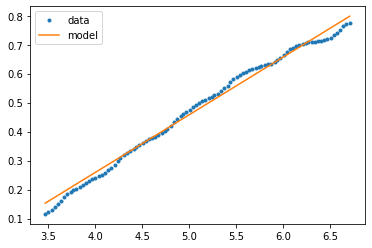

In [16]:
y_model = A.dot(k_optimum.T)
fig = plt.figure()
ax = fig.add_subplot()
a = ax.plot(t_2,x_2,'.')
b = ax.plot(t_2,y_model)
ax.legend(a+b,['data','model'])

## 1/3 Gait Size Test

In [17]:
A = numpy.array([(t_3)-1]).T

In [18]:
def myfunc(k):
    # make sure our coefficients are in the form of a numpy array
    k = numpy.array(k)
    # generate y* = Ak^T
    y_model = A.dot(k.T)
    # sum the square of the error of our model against the input data, y_rand
    error = ((y_model-x_3)**2).sum()
    #return the error
    return error

In [19]:
ini = [1]*A.shape[1]
ini

[1]

In [20]:
sol = scipy.optimize.minimize(myfunc,ini)
k_optimum = sol.x
Velocity_3 = k_optimum
Velocity_3

array([0.28302859])

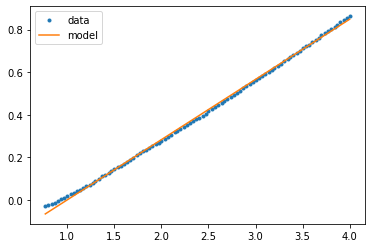

In [21]:
y_model = A.dot(k_optimum.T)
fig = plt.figure()
ax = fig.add_subplot()
a = ax.plot(t_3,x_3,'.')
b = ax.plot(t_3,y_model)
ax.legend(a+b,['data','model'])

## 1/4 Gait Size Test #1

Note: The initial test for the 1/4 gait size resulted in the prototype following a curved path. Therefore, the results of this experiment will not be utilized for the final calculations, but are presented here to showcase the team's work throughout this experiment.

In [22]:
A = numpy.array([(t_4_1)]).T

In [23]:
def myfunc(k):
    # make sure our coefficients are in the form of a numpy array
    k = numpy.array(k)
    # generate y* = Ak^T
    y_model = A.dot(k.T)
    # sum the square of the error of our model against the input data, y_rand
    error = ((y_model-x_4_1)**2).sum()
    #return the error
    return error

In [24]:
ini = [1]*A.shape[1]
ini

[1]

In [25]:
sol = scipy.optimize.minimize(myfunc,ini)
k_optimum = sol.x
Velocity_4_1 = k_optimum
Velocity_4_1

array([0.16217159])

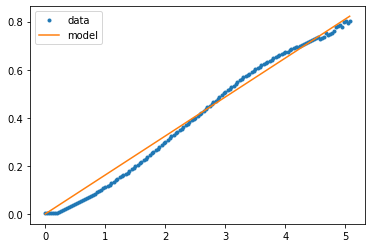

In [26]:
y_model = A.dot(k_optimum.T)
fig = plt.figure()
ax = fig.add_subplot()
a = ax.plot(t_4_1,x_4_1,'.')
b = ax.plot(t_4_1,y_model)
ax.legend(a+b,['data','model'])

## 1/4 Gait Size Test #2

In [27]:
A = numpy.array([(t_4_2)-0.8]).T

In [28]:
def myfunc(k):
    # make sure our coefficients are in the form of a numpy array
    k = numpy.array(k)
    # generate y* = Ak^T
    y_model = A.dot(k.T)
    # sum the square of the error of our model against the input data, y_rand
    error = ((y_model-x_4_2)**2).sum()
    #return the error
    return error

In [29]:
ini = [1]*A.shape[1]
ini

[1]

In [30]:
sol = scipy.optimize.minimize(myfunc,ini)
k_optimum = sol.x
Velocity_4_2 = k_optimum
Velocity_4_2

array([0.23175833])

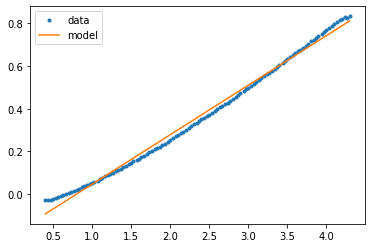

In [31]:
y_model = A.dot(k_optimum.T)
fig = plt.figure()
ax = fig.add_subplot()
a = ax.plot(t_4_2,x_4_2,'.')
b = ax.plot(t_4_2,y_model)
ax.legend(a+b,['data','model'])

# Analysis of Velocities and Determination of Optimal Gait Size

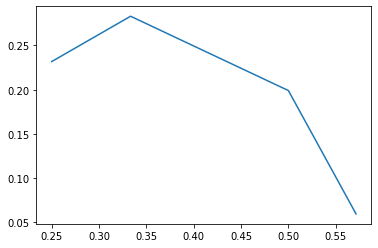

In [32]:
# Plot Velocities vs Gait Size

Gait_Size = numpy.array([4/7, 1/2, 1/3, 1/4])
Velocities = numpy.array([Velocity_47, Velocity_2, Velocity_3, Velocity_4_2])
plt.plot(Gait_Size,Velocities)

In [33]:
A = numpy.array([(Gait_Size)**2,(Gait_Size)**3]).T

In [34]:
def myfunc(k):
    # make sure our coefficients are in the form of a numpy array
    k = numpy.array(k)
    # generate y* = Ak^T
    y_model = A.dot(k.T)
    # sum the square of the error of our model against the input data, y_rand
    error = ((y_model-Velocities)**2).sum()
    #return the error
    return error

In [35]:
ini = [1]*A.shape[1]
ini

[1, 1]

In [36]:
sol = scipy.optimize.minimize(myfunc,ini)
k_optimum = sol.x
k_optimum

array([ 3.70893712, -5.57735624])

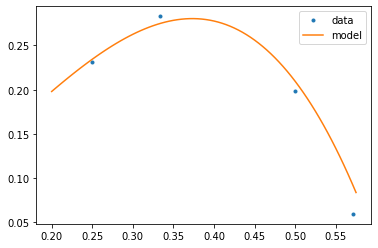

In [37]:
# Plot Optimization Function

x = numpy.r_[0.2:0.58:.005]
A = numpy.array([(x+0.07)**2,(x+0.07)**3]).T-0.02

y_model = A.dot(k_optimum.T)
fig = plt.figure()
ax = fig.add_subplot()
a = ax.plot(Gait_Size,Velocities,'.')
b = ax.plot(x,y_model)
ax.legend(a+b,['data','model'])

In [38]:
# Determine Optimal Gait Size and Maximum Speed:

Max_Velocity = max(y_model)
print('Maximum_Velocity:')
print(Max_Velocity,'m/s')

y_model = y_model.tolist()
max_index = y_model.index(Max_Velocity)
Optimal_Gait = x[max_index]
print('Optimal Gait:')
print(Optimal_Gait,'Gait Size')

Maximum_Velocity:
0.28034775020146807 m/s
Optimal Gait:
0.37500000000000017 Gait Size
